In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
path_dir = './LFW-FER/eval/negative/'
file_list = os.listdir(path_dir)
# file_list[0]

In [4]:
#figure seting 

def fig_set(fig, rows, cols, num, img, label):
    ax = fig.add_subplot(rows, cols, num)
    ax.imshow(img)
    ax.set_xlabel(label)
    ax.set_xticks([]), ax.set_yticks([])

- plt.imshow()함수는 RGB 순으로 해석, OpenCV는 컬러 이미지를 BGR순으로 인식 하므로 컬러를 뒤집어서 나타내 주어야함

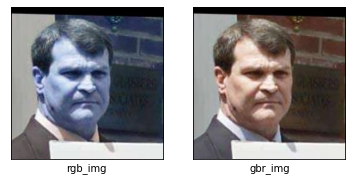

In [5]:
img = np.zeros((120, 120), dtype=np.uint8)
img_rgb = cv2.imread(path_dir + file_list[0])
img_gbr = img_rgb[:,:,::-1]

fig = plt.figure()
fig_set(fig, 1, 2, 1, img_rgb, 'rgb_img')
fig_set(fig, 1, 2, 2, img_gbr, 'gbr_img')

- img 자체에 연산을 하게 되면, 이미지 내에 있는 모든 배열의 벨류값에 100을 더해주게 된다.  
  -->  ```포화연산처리가 안되어 이미지 색상이 이상하게 나온다```
  * 포화연산: 픽셀 값이 최대치와 최소치를 넘으면 최대치와 최소치로 처리하는 연산

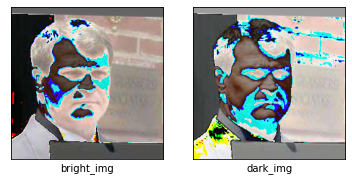

In [6]:
img1 = img_gbr + 100
img2 = img_gbr - 100

fig = plt.figure()

fig_set(fig, 1, 2, 1, img1, 'bright_img')
fig_set(fig, 1, 2, 2, img2, 'dark_img')

- int32: ```-2147483648 ~ 2147483648   (부호 있음)```
- Uint8: ```0 ~ 255                    (부호 없음)```

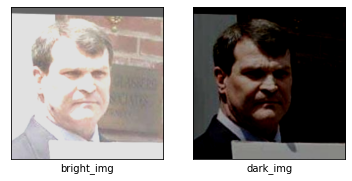

In [7]:
img1 = np.clip(img_gbr.astype('int32')+100,0,225).astype('uint8')
img2 = np.clip(img_gbr.astype('int32')-100,0,225).astype('uint8')

fig = plt.figure()

fig_set(fig, 1, 2, 1, img1, 'bright_img')
fig_set(fig, 1, 2, 2, img2, 'dark_img')

- Trackbar를 이용한 이미지 밝기 조절

In [8]:
def trackbar_bright(img, num):
    return np.clip(img.astype('int32')+num,0,225).astype('uint8')

def trackbar_dark(img, num):
    return np.clip(img.astype('int32')-num,0,225).astype('uint8')

In [9]:

cv2.imshow('img', img_rgb)
cv2.createTrackbar('bright', 'img', 0, 100, lambda pos: cv2.imshow('img', trackbar_bright(img_rgb, pos)))
cv2.createTrackbar('dark', 'img', 0, 100, lambda pos: cv2.imshow('img', trackbar_dark(img_rgb, pos)))
cv2.waitKey(0)
cv2.destroyAllWindows()